# Package Import (Must Run)

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, ENGLISH_STOP_WORDS
import string
import re
from sklearn import metrics
from nltk.stem import PorterStemmer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

# Constants and Helper Functions (Must Run)¶

In [2]:
#-----------------------------Constants-----------------------------------#
k = 1000

COMPUTER_TECHNOLOGY = 0

RECREATIONAL_ACTIVITY = 1

# index of the last computer technology data group in variable 'categories'
LAST_COMPUTER_TECHNOLOGY_INDEX = 3 


#-----------------------------Helper Functions----------------------------#

def tokenizer_stem(text):
    # Convert each punctuation character to empty character.
    punc_remove_map = text.maketrans('', '', string.punctuation)
    text_no_punc = text.translate(punc_remove_map)
    
    # remove non-ascii characters
    ascii_text_no_punc = "".join(ch for ch in text_no_punc if ord(ch) < 128) 
    
    # Convert words that share the same stem to the stem
    tokens = ascii_text_no_punc.split()
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(n) for n in tokens if not n.isdigit()]
    return stemmed_tokens



def get_target_values(target_array):
    target_values = []
    for n in range(target_array.shape[0]):
        if target_array[n] <= LAST_COMPUTER_TECHNOLOGY_INDEX:
            target_values.append(COMPUTER_TECHNOLOGY)
        else:
            target_values.append(RECREATIONAL_ACTIVITY)
    return np.array(target_values)


# find best r using SVD

def find_best_r_svd (r):
    r_value = eight_train_tfidf_min_df_3_lsa[:, :r]
    kmeans_predicted = KMeans(n_clusters=2, random_state=42).fit_predict(r_value)
    print("contingency matrix for r =", r)
    confusionmatrix = confusion_matrix(eight_train_target, kmeans_predicted)
    print(confusionmatrix)
    scores = []
    scores.append(metrics.homogeneity_score(eight_train_target, kmeans_predicted))
    scores.append(metrics.completeness_score(eight_train_target, kmeans_predicted))
    scores.append(metrics.v_measure_score(eight_train_target, kmeans_predicted))
    scores.append(metrics.adjusted_rand_score(eight_train_target, kmeans_predicted))
    scores.append(metrics.adjusted_mutual_info_score(eight_train_target, kmeans_predicted))
    return scores
    
def find_best_r_nmf (r):
    r_value = NMF(n_components=r).fit_transform(eight_train_tfidf_min_df_3)
    kmeans_predicted = KMeans(n_clusters=2, random_state=42).fit_predict(r_value)
    print("contingency matrix for r =", r)
    confusionmatrix = confusion_matrix(eight_train_target, kmeans_predicted)
    print(confusionmatrix)
    scores = []
    scores.append(metrics.homogeneity_score(eight_train_target, kmeans_predicted))
    scores.append(metrics.completeness_score(eight_train_target, kmeans_predicted))
    scores.append(metrics.v_measure_score(eight_train_target, kmeans_predicted))
    scores.append(metrics.adjusted_rand_score(eight_train_target, kmeans_predicted))
    scores.append(metrics.adjusted_mutual_info_score(eight_train_target, kmeans_predicted))
    return scores
    




# Classification Preparation (Must Run)

In [3]:
# Extract datasets
categories = ['comp.graphics',
              'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware',
              'rec.autos',
              'rec.motorcycles',
              'rec.sport.baseball',
              'rec.sport.hockey']

eight_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
eight_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

# Set labels for binary classifiers
eight_train_target = get_target_values(eight_train.target)
eight_test_target = get_target_values(eight_test.target)

# Initialize term count vectorizers
count_vectorizer_min_df_3 = CountVectorizer(
    analyzer = 'word',
    stop_words = ENGLISH_STOP_WORDS,
    min_df = 3
)



train_count_min_df_3 = count_vectorizer_min_df_3.fit_transform(eight_train.data)
test_count_min_df_3 = count_vectorizer_min_df_3.transform(eight_test.data)


# TFIDF transformer
tfidf_transformer = TfidfTransformer()
# Compute tfidf Matrices
eight_train_tfidf_min_df_3 = tfidf_transformer.fit_transform(train_count_min_df_3)
eight_test_tfidf_min_df_3 = tfidf_transformer.transform(test_count_min_df_3)

#----------------------Dimension Reduction Process------------------------#

# Latent Sematic Analysis(LSA)
lsa_model = TruncatedSVD(n_components=k, random_state=42)
# Non-Negative Matrix Factorization (NMF)
#nmf_model = NMF(n_components=k, random_state = 42)


# Dense matrices computed using LSA
eight_train_tfidf_min_df_3_lsa = lsa_model.fit_transform(eight_train_tfidf_min_df_3)
#eight_test_tfidf_min_df_3_lsa = lsa_model.transform(eight_test_tfidf_min_df_3)

# Dense matrices computed using NMF
#eight_train_tfidf_min_df_3_nmf = nmf_model.fit_transform(eight_train_tfidf_min_df_3)
#eight_test_tfidf_min_df_3_nmf = nmf_model.transform(eight_test_tfidf_min_df_3)


# Problem 1

In [4]:
print("Dimensions of TF-IDF matrix: "+ str(eight_train_tfidf_min_df_3.shape))

Dimensions of TF-IDF matrix: (4732, 20297)


# Problem 2

In [5]:
#(a)
kmeans = KMeans(n_clusters=2, random_state=42).fit(eight_train_tfidf_min_df_3)
confusionmatrix = confusion_matrix(eight_train_target, kmeans.labels_, labels = [COMPUTER_TECHNOLOGY, RECREATIONAL_ACTIVITY])
print("contingency matrix:")
print(confusionmatrix)

contingency matrix:
[[2340    3]
 [1339 1050]]


In [6]:
#(b)
print("Homogeneity: %f" % metrics.homogeneity_score(eight_train_target, kmeans.labels_))
print("Completeness: %f" % metrics.completeness_score(eight_train_target, kmeans.labels_))
print("V-measure: %f" % metrics.v_measure_score(eight_train_target, kmeans.labels_))
print("Adjusted Rand Score: %f" % metrics.adjusted_rand_score(eight_train_target, kmeans.labels_))
print("Adjusted Mutual Info Score: %f" % metrics.adjusted_mutual_info_score(eight_train_target, kmeans.labels_))

Homogeneity: 0.258249
Completeness: 0.337666
V-measure: 0.292666
Adjusted Rand Score: 0.187172
Adjusted Mutual Info Score: 0.258136


# Problem 3

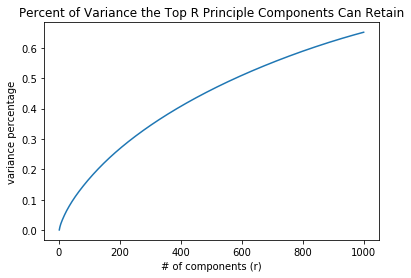

In [7]:
# (a), plot of the percent of variance the toprprinciple components canretain v.s r
lsa_model = TruncatedSVD(n_components=1000, random_state=42)
eight_train_tfidf_min_df_3_lsa_var = lsa_model.fit(eight_train_tfidf_min_df_3)
variance_ratio = eight_train_tfidf_min_df_3_lsa_var.explained_variance_ratio_

#plotting variance curve
plt.plot(range(1, 1001), np.cumsum(variance_ratio))
plt.xlabel('# of components (r)')
plt.ylabel('variance percentage')
plt.title('Percent of Variance the Top R Principle Components Can Retain')
plt.show()

contingency matrix for r = 1
[[1061 1282]
 [1048 1341]]
contingency matrix for r = 2
[[2289   54]
 [ 495 1894]]
contingency matrix for r = 3
[[2338    5]
 [1298 1091]]
contingency matrix for r = 5
[[   2 2341]
 [ 934 1455]]
contingency matrix for r = 10
[[   2 2341]
 [ 963 1426]]
contingency matrix for r = 20
[[   2 2341]
 [ 974 1415]]
contingency matrix for r = 50
[[2341    2]
 [1420  969]]
contingency matrix for r = 100
[[   2 2341]
 [ 963 1426]]
contingency matrix for r = 300
[[   2 2341]
 [ 964 1425]]


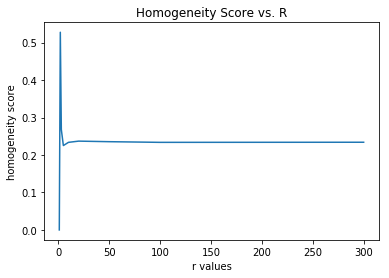

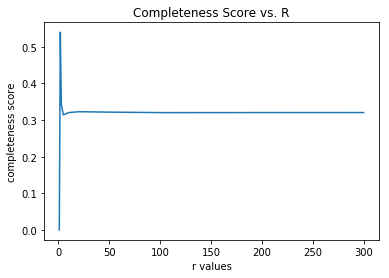

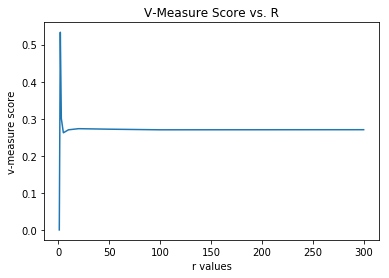

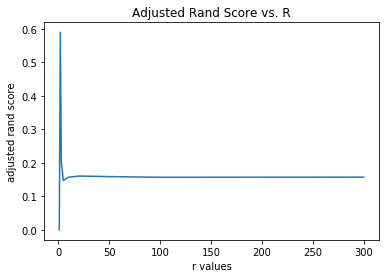

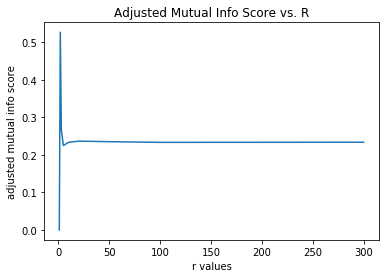

In [8]:
# (b) find best r using SVD

r_list = [1,2,3,5,10,20,50,100,300]
homogeneity = []
completeness = []
v_measure = []
adjusted_rand = []
adjusted_mutual_info = []
for r in r_list:
    scores = find_best_r_svd(r)
    homogeneity.append(scores[0])
    completeness.append(scores[1])
    v_measure.append(scores[2])
    adjusted_rand.append(scores[3])
    adjusted_mutual_info.append(scores[4])
    
plt.plot(r_list, homogeneity)
plt.xlabel('r values')
plt.ylabel('homogeneity score')
plt.title('Homogeneity Score vs. R')
plt.show()

plt.plot(r_list, completeness)
plt.xlabel('r values')
plt.ylabel('completeness score')
plt.title('Completeness Score vs. R')
plt.show()

plt.plot(r_list, v_measure)
plt.xlabel('r values')
plt.ylabel('v-measure score')
plt.title('V-Measure Score vs. R')
plt.show()

plt.plot(r_list, adjusted_rand)
plt.xlabel('r values')
plt.ylabel('adjusted rand score')
plt.title('Adjusted Rand Score vs. R')
plt.show()

plt.plot(r_list, adjusted_mutual_info)
plt.xlabel('r values')
plt.ylabel('adjusted mutual info score')
plt.title('Adjusted Mutual Info Score vs. R')
plt.show()


contingency matrix for r = 1
[[1061 1282]
 [1048 1341]]
contingency matrix for r = 2
[[2221  122]
 [ 141 2248]]
contingency matrix for r = 3
[[2342    1]
 [1441  948]]
contingency matrix for r = 5
[[   2 2341]
 [ 756 1633]]
contingency matrix for r = 10
[[   3 2340]
 [ 767 1622]]
contingency matrix for r = 20
[[2277   66]
 [2389    0]]
contingency matrix for r = 50
[[2341    2]
 [2014  375]]
contingency matrix for r = 100
[[2333   10]
 [2389    0]]
contingency matrix for r = 300
[[   0 2343]
 [  19 2370]]


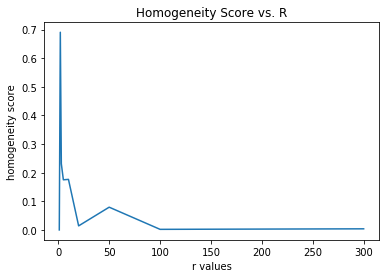

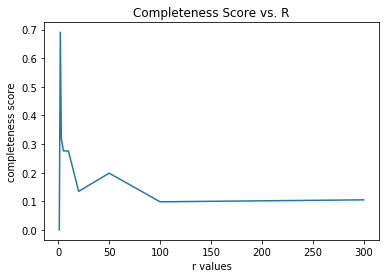

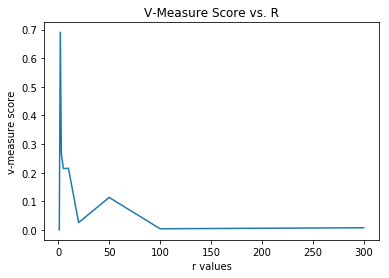

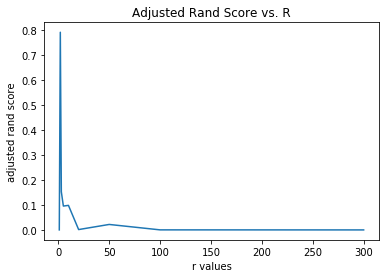

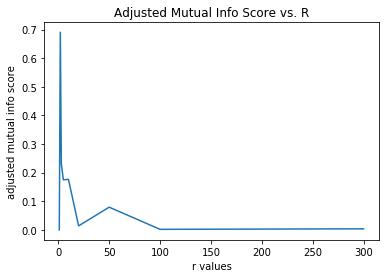

In [9]:
# (b) find best r using NMF
r_list = [1,2,3,5,10,20,50,100,300]
homogeneity = []
completeness = []
v_measure = []
adjusted_rand = []
adjusted_mutual_info = []
for r in r_list:
    scores = find_best_r_nmf(r)
    homogeneity.append(scores[0])
    completeness.append(scores[1])
    v_measure.append(scores[2])
    adjusted_rand.append(scores[3])
    adjusted_mutual_info.append(scores[4])
    
plt.plot(r_list, homogeneity)
plt.xlabel('r values')
plt.ylabel('homogeneity score')
plt.title('Homogeneity Score vs. R')
plt.show()

plt.plot(r_list, completeness)
plt.xlabel('r values')
plt.ylabel('completeness score')
plt.title('Completeness Score vs. R')
plt.show()

plt.plot(r_list, v_measure)
plt.xlabel('r values')
plt.ylabel('v-measure score')
plt.title('V-Measure Score vs. R')
plt.show()

plt.plot(r_list, adjusted_rand)
plt.xlabel('r values')
plt.ylabel('adjusted rand score')
plt.title('Adjusted Rand Score vs. R')
plt.show()

plt.plot(r_list, adjusted_mutual_info)
plt.xlabel('r values')
plt.ylabel('adjusted mutual info score')
plt.title('Adjusted Mutual Info Score vs. R')
plt.show()